# Analysis of EBA Transparency Exercise Datasets

## Introduction

This notebook explores the datasets provided by the European Banking Authority (EBA) under their EU-wide Transparency Exercise, accessible [here](https://www.eba.europa.eu/risk-analysis-and-data/eu-wide-transparency-exercise). These datasets offer a comprehensive view of the banking sector's assets and risks, which is invaluable for financial analysis and regulatory assessment.

### Notes

- **Understand the Structure**: We will examine the structure and content of the EBA's credit risk dataset to understand the type of data provided and its potential applications.
- **Ensure Data Integrity**: Although these datasets are generally user-friendly, they require additional checks to validate data integrity and reliability. You should compare a sample of your intermediary results with the results presented by the EBA's interactive tool, specifically the visualizations found [here](https://tools.eba.europa.eu/interactive-tools/2023/powerbi/837203/tr23_visualisation_page5.html), to confirm consistency and understand any discrepancies.
- **Download the credit risk datasets from here**: https://www.eba.europa.eu/assets/TE2023/Full_database/837203/tr_cre.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.2f}'.format

#### A. Create base table

In [2]:
# Import mappning tables
exposures = pd.read_excel('kala_eba_tr.xlsx', sheet_name='Exposures')
portfolio = pd.read_excel('kala_eba_tr.xlsx', sheet_name='Portfolio')
country = pd.read_excel('kala_eba_tr.xlsx', sheet_name='Country')
status = pd.read_excel('kala_eba_tr.xlsx', sheet_name='Status')
perf_status = pd.read_excel('kala_eba_tr.xlsx', sheet_name='Perf_Status')
institutions = pd.read_excel('kala_eba_tr.xlsx', sheet_name='List of institutions')

# import core dataset
df = pd.read_csv('tr_cre.csv', low_memory=False)

In [3]:
# Create final dataset
result = pd.merge(df, exposures, on='Exposure', how='left')
result = pd.merge(result, portfolio, on='Portfolio', how='left')
result = pd.merge(result, country, on='Country', how='left')
result = pd.merge(result, status, on='Status', how='left')
result = pd.merge(result, perf_status, on='Perf_Status', how='left')
result = pd.merge(result, institutions, on='LEI_Code', how='left')

result.head()

,LEI_Code,NSA,Period,Item,Label,Portfolio,Country,Country_rank,Exposure,Status,Perf_Status,NACE_codes,Amount,Footnote,Row,Column,Sheet,exposure_label,portfolio_label,country_label,ISO_code,status_label,perf_status_label,institution_country,Desc_country,Name,Finrep,Fin_year_end
0,0W2PZJM8XOY22M4GG883,DE,202209,2320502,Original Exposure - by exposure class (SA_and_IRB),2,0,0,103,0,0,0,419.98,NaN,10,4,Credit Risk_IRB_a,Central governments or central banks,IRB,Total / No breakdown,00,No breakdown by status,No breakdown by Perf_status,DE,Germany,DekaBank Deutsche Girozentrale,Yes - IFRS,31/12
1,0W2PZJM8XOY22M4GG883,DE,202209,2320502,Original Exposure - by exposure class (SA_and_IRB),2,0,0,203,0,0,0,"16,941.37",NaN,11,4,Credit Risk_IRB_a,Institutions,IRB,Total / No breakdown,00,No breakdown by status,No breakdown by Perf_status,DE,Germany,DekaBank Deutsche Girozentrale,Yes - IFRS,31/12
2,0W2PZJM8XOY22M4GG883,DE,202209,2320502,Original Exposure - by exposure class (SA_and_IRB),2,0,0,303,0,0,0,"32,797.84",NaN,12,4,Credit Risk_IRB_a,Corporates,IRB,Total / No breakdown,00,No breakdown by status,No breakdown by Perf_status,DE,Germany,DekaBank Deutsche Girozentrale,Yes - IFRS,31/12
3,0W2PZJM8XOY22M4GG883,DE,202209,2320502,Original Exposure - by exposure class (SA_and_IRB),2,0,0,404,0,0,0,0.00,NaN,15,4,Credit Risk_IRB_a,Retail,IRB,Total / No breakdown,00,No breakdown by status,No breakdown by Perf_status,DE,Germany,DekaBank Deutsche Girozentrale,Yes - IFRS,31/12
4,0W2PZJM8XOY22M4GG883,DE,202209,2320502,Original Exposure - by exposure class (SA_and_IRB),2,0,0,606,0,0,0,400.26,NaN,23,4,Credit Risk_IRB_a,Equity exposures,IRB,Total / No breakdown,00,No breakdown by status,No breakdown by Perf_status,DE,Germany,DekaBank Deutsche Girozentrale,Yes - IFRS,31/12


In [4]:
result['Label'].unique()

array(['Original Exposure - by exposure class (SA_and_IRB)',
       'Original Exposure - SME - by exposure class (SA_and_IRB)',
       'Original Exposure - Corporates - Specialised Lending (IRB)',
       'Original Exposure - Retail - by type (IRB)',
       'Original Exposure - Retail_non SME - by type (IRB)',
       'Original Exposure - of which_DEFAULTED - by exposure class (SA_and_IRB)',
       'Original Exposure - SME_of which_DEFAULTED - by exposure class (SA_and_IRB)',
       'Original Exposure - Corporates_Specialised Lending - of which_DEFAULTED (IRB)',
       'Original Exposure - Retail of which_DEFAULTED - by type (IRB)',
       'Original Exposure - Retail - non SME - of which_DEFAULTED - by type (IRB)',
       'Exposure value - by exposure class (SA_and_IRB)',
       'Exposure value - SME - by exposure class (SA_and_IRB)',
       'Exposure value - Corporates_Specialised Lending (IRB)',
       'Exposure value - Retail - by type (IRB)',
       'Exposure value - Retail - non SME

In [5]:
# Check the number of observations per row
idx_1 = result['Label'] == 'Exposure value - by exposure class (SA_and_IRB)'
idx_2 = result['Period'] == 202306
idx_3 = result['Desc_country'] == result['country_label']

# Sanity checking, only one row per groupby is expected
test = result[idx_1 & idx_2 & idx_3].groupby(['Desc_country', 'exposure_label', 'portfolio_label', 'Name']).agg({'Amount': ['sum', 'count']})
assert test[test.columns[-1]].max() == 1, 'Your filtering criteria is likely to be deficient'

In [6]:
# Create base table
idx_1 = result['Label'] == 'Exposure value - by exposure class (SA_and_IRB)'
idx_2 = result['Period'] == 202306
idx_3 = result['Desc_country'] == result['country_label']

pivot_df = pd.pivot_table(result[idx_1 & idx_2 & idx_3], 
                          values='Amount', 
                          index=['exposure_label', 'portfolio_label'], 
                          columns=['Name'], 
                          aggfunc="sum", 
                          margins=True,
                          fill_value=0).reset_index()

pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False).head()

Name,exposure_label,portfolio_label,ABN AMRO Bank N.V.,AGRI EUROPE CYPRUS LIMITED,AIB Group plc,ALPHA SERVICES AND HOLDINGS S.A.,AS LHV Group,"Abanca Corporacion Bancaria, S.A.","Akciju sabiedrība ""Citadele banka""",Akcinė bendrovė Šiaulių bankas,Arion banki hf,Atlantic Lux HoldCo S.à r.l.,BANCA POPOLARE DI SONDRIO SOCIETA' PER AZIONI,BANCO BPM SOCIETA' PER AZIONI,BAWAG Group AG,BNG Bank N.V.,BNP Paribas,BPER Banca S.p.A.,Banca Transilvania,"Banco Bilbao Vizcaya Argentaria, S.A.","Banco Comercial Português, SA","Banco Santander, S.A.",Banco de Crédito Social Cooperativo,"Banco de Sabadell, S.A.",Bank of America Europe Designated Activity Company,Bank of Cyprus Holdings Public Limited Company,Bank of Ireland Group plc,Bank of Valletta Plc,"Bankinter, S.A.",Banque Internationale à Luxembourg,"Banque et Caisse d´Epargne de l´Etat, Luxembourg",Barclays Bank Ireland plc,Bayerische Landesbank,Belfius Bank,Bpifrance,COMMERZBANK Aktiengesellschaft,CREDITO EMILIANO HOLDING SOCIETA' PER AZIONI,"Caixa Geral de Depósitos, S.A.","CaixaBank, S.A.",Citibank Holdings Ireland Limited,Citigroup Global Markets Europe AG,Confédération Nationale du Crédit Mutuel,Coöperatieve Rabobank U.A.,Crelan,DEUTSCHE BANK AKTIENGESELLSCHAFT,DNB BANK ASA,"DZ BANK AG Deutsche Zentral-Genossenschaftsbank, Frankfurt am Main",Danske Bank A/S,DekaBank Deutsche Girozentrale,Deutsche Pfandbriefbank AG,Erste Group Bank AG,Erwerbsgesellschaft der S-Finanzgruppe mbH & Co. KG,Eurobank Ergasias Services and Holdings S.A.,FINECOBANK SPA,Goldman Sachs Bank Europe SE,Groupe BPCE,Groupe Crédit Agricole,HSBC Continental Europe,Hamburg Commercial Bank AG,Hellenic Bank Public Company Ltd,ING Groep N.V.,Intesa Sanpaolo S.p.A.,Investeringsmaatschappij Argenta,J.P. Morgan SE,Jyske Bank A/S,KBC Groep,Kommuninvest - Grupp,"Kutxabank, S.A.",LGT Group Foundation,LSF Nani Investments S.à r.l.,La Banque Postale,Landesbank Baden-Württemberg,Landesbank Hessen-Thüringen Girozentrale,Liechtensteinische Landesbank AG,Luminor Holding AS,MDB Group Limited,Mediobanca - Banca di Credito Finanziario S.p.A.,Morgan Stanley Europe Holding SE,Münchener Hypothekenbank eG,"National Bank of Greece, S.A.",Nederlandse Waterschapsbank N.V.,Norddeutsche Landesbank - Girozentrale -,Nordea Bank Abp,"Nova Ljubljanska Banka d.d., Ljubljana",Nykredit Realkredit A/S,OP Osuuskunta,OTP-csoport,Piraeus Financial Holdings,Quintet Private Bank (Europe) S.A,RCI Banque,Raiffeisen Bank International AG,Raiffeisenbankengruppe OÖ Verbund eGen,Revolut Holdings Europe UAB,SBAB Bank AB - Grupp,SFIL S.A.,SPAREBANK 1 SR-BANK ASA,Skandinaviska Enskilda Banken - gruppen,Société générale S.A.,SpareBank 1 SMN,State Street Europe Holdings Germany S.a.r.l. & Co. KG,Svenska Handelsbanken - gruppen,Swedbank - Grupp,The Bank of New York Mellon,UBS Europe SE,"UNICREDIT, SOCIETA' PER AZIONI","Unicaja Banco, S.A.",Volksbanken Verbund,Volkswagen Bank Gesellschaft mit beschränkter Haftung,de Volksbank N.V.,Íslandsbanki hf.,All
21,All,,"299,083.58","2,047.87","92,407.52","47,148.63","5,879.65","57,171.53","1,950.29","4,115.65","8,653.66","13,690.87","46,721.03","169,736.49","28,220.44","119,120.74","576,199.38","121,505.48","27,684.88","298,298.97","48,799.97","359,423.48","49,914.66","154,238.33","7,576.55","21,177.15","87,126.55","10,059.28","86,588.50","17,563.38","42,365.32","2,112.94","257,633.45","163,693.24","112,356.22","300,902.70","50,144.49","68,814.27","449,670.96","4,806.06","4,554.49","829,142.39","428,063.15","57,583.17","356,870.33","170,257.03","448,082.28","196,150.12","45,850.26","15,996.76","126,881.72","61,804.59","54,861.26","13,889.65","17,682.53","1,135,521.35","1,128,218.95","96,501.70","12,956.31","6,712.05","269,483.53","495,688.44","26,381.68","99,684.25","73,963.21","128,211.05","48,495.70","65,579.05","2,970.85","28,707.32","306,533.04","231,253.47","151,044.40","4,775.84","3,867.62",435.78,"58,117.53","17,016.61","42,879.72","52,513.40","79,876.43","82,274.41","113,046.43","12,360.78","198,549.87","123,457.85","3

#### B. Calculate RWA values

In [7]:
# Calculate RWA values
idx_1 = result['Desc_country'] == result['country_label']
idx_2 = result['Label'].isin(['Exposure value - by exposure class (SA_and_IRB)', 
                              'Risk exposure amount - by exposure class (SA_and_IRB)', 
                              'Risk Exposure amount - of which_DEFAULTED  - by exposure class (IRB)'])
idx_3 = result['Period'] == 202306

pivot_df2 = pd.pivot_table(result[idx_1 & idx_2 & idx_3], 
                      values='Amount', 
                      index=['exposure_label', 'portfolio_label', 'Name', 'country_label'], 
                      columns=['Label'], 
                      aggfunc="sum", 
                      margins=False,
                      fill_value=0).reset_index()


# Create a rank based on the summed 'Exposure value', sorted by size
grouped = pivot_df2.groupby('exposure_label')['Exposure value - by exposure class (SA_and_IRB)'].sum()
rank = grouped.sort_values(ascending=False).rank(method='dense', ascending=False).astype(int)

# Map the ranks back to the original DataFrame
pivot_df2['exposure_type_size'] = pivot_df2['exposure_label'].map(rank)

pivot_df2 = pivot_df2.rename(columns={
    'Exposure value - by exposure class (SA_and_IRB)': 'exposure_value',
    'Risk exposure amount - by exposure class (SA_and_IRB)': 'risk_exposure',
    'Risk Exposure amount - of which_DEFAULTED  - by exposure class (IRB)': 'defaulted_risk_exposure',
})

pivot_df2['risk_weight'] = (pivot_df2['risk_exposure'] / pivot_df2['exposure_value']) * 100


pivot_df2.sort_values(by='exposure_type_size', ascending=True).reset_index().head(20)

Label,index,exposure_label,portfolio_label,Name,country_label,exposure_value,defaulted_risk_exposure,risk_exposure,exposure_type_size,risk_weight
0,1772,Retail,IRB,ABN AMRO Bank N.V.,Netherlands,"160,710.38","1,623.85","17,262.55",1,10.74
1,1882,Retail,SA,Danske Bank A/S,Denmark,0.30,0.00,70.14,1,"23,147.34"
2,1883,Retail,SA,DekaBank Deutsche Girozentrale,Germany,85.29,0.00,55.77,1,65.39
3,1884,Retail,SA,Deutsche Pfandbriefbank AG,Germany,0.05,0.00,0.03,1,75.00
4,1885,Retail,SA,Erste Group Bank AG,Austria,706.87,0.00,452.43,1,64.00
5,1886,Retail,SA,Erwerbsgesellschaft der S-Finanzgruppe mbH & Co. KG,Germany,"2,617.35",0.00,"1,962.82",1,74.99
6,1887,Retail,SA,Eurobank Ergasias Services and Holdings S.A.,Greece,"3,529.87",0.00,"2,464.18",1,69.81
7,1888,Retail,SA,FINECOBANK SPA,Italy,"1,322.14",0.00,991.61,1,75.00
8,1889,Retail,SA,Goldman Sachs Bank Europe SE,Germany,0.00,0.00,0.00,1,NaN
9,1890,Retail,SA,Groupe BPCE,France,"5,330.31",0.00,"3,842.57",1,72.09


#### C. Show RWA and Exposure values for the NL banks

In [8]:
z = pd.pivot_table(pivot_df2[pivot_df2['country_label'] == 'Netherlands'], 
                   values='risk_weight', 
                   index=['exposure_label', 'portfolio_label', 'exposure_type_size'], 
                   columns=['Name'], 
                   aggfunc="sum", 
                   margins=False,
                   fill_value=np.nan).reset_index()

z.sort_values(by='exposure_type_size', ascending=True).head(20)

Name,exposure_label,portfolio_label,exposure_type_size,ABN AMRO Bank N.V.,BNG Bank N.V.,Coöperatieve Rabobank U.A.,ING Groep N.V.,Nederlandse Waterschapsbank N.V.,de Volksbank N.V.
18,Retail,IRB,1,10.74,NaN,11.21,13.70,NaN,20.17
19,Retail,SA,1,75.00,0.00,66.94,62.16,0.00,60.04
0,Central governments or central banks,IRB,2,0.00,NaN,0.25,0.00,NaN,0.00
1,Central governments or central banks,SA,2,0.29,0.00,172.21,0.00,0.00,0.98
4,Corporates,IRB,3,54.01,NaN,40.75,28.63,NaN,0.00
5,Corporates,SA,3,75.49,86.26,92.66,97.54,90.29,86.26
11,Institutions,SA,4,22.66,21.18,90.38,25.77,35.03,28.91
10,Institutions,IRB,4,28.37,NaN,21.16,15.72,NaN,0.00
20,Secured by mortgages on immovable property,SA,5,36.87,0.00,38.26,49.80,0.00,40.99
17,Regional governments or local authorities,SA,6,0.02,0.05,0.00,20.00,0.00,0.00


In [9]:
z = pd.pivot_table(pivot_df2[pivot_df2['country_label'] == 'Netherlands'], 
                   values='exposure_value', 
                   index=['exposure_label', 'portfolio_label', 'country_label', 'exposure_type_size'], 
                   columns=['Name'], 
                   aggfunc="sum", 
                   margins=False,
                   fill_value=np.nan).reset_index()

z.sort_values(by='exposure_type_size', ascending=True).reset_index(drop=True).head(20)

Name,exposure_label,portfolio_label,country_label,exposure_type_size,ABN AMRO Bank N.V.,BNG Bank N.V.,Coöperatieve Rabobank U.A.,ING Groep N.V.,Nederlandse Waterschapsbank N.V.,de Volksbank N.V.
0,Retail,IRB,Netherlands,1,"160,710.38",NaN,"220,833.77","125,288.79",NaN,"50,226.04"
1,Retail,SA,Netherlands,1,"2,645.46",0.00,"1,579.99",156.22,0.00,290.98
2,Central governments or central banks,IRB,Netherlands,2,0.00,NaN,"96,187.36",0.00,NaN,0.00
3,Central governments or central banks,SA,Netherlands,2,"63,051.59","72,957.38",979.72,"57,644.55","59,933.91","11,751.62"
4,Corporates,IRB,Netherlands,3,"62,774.26",NaN,"98,643.54","78,991.62",NaN,0.00
5,Corporates,SA,Netherlands,3,"2,995.66","6,818.81","1,780.72","1,020.40","2,446.10",908.78
6,Institutions,SA,Netherlands,4,"3,322.16",163.76,55.55,54.17,388.30,628.09
7,Institutions,IRB,Netherlands,4,"1,649.65",NaN,"4,804.63","4,536.79",NaN,0.00
8,Secured by mortgages on immovable property,SA,Netherlands,5,482.79,0.00,595.84,"1,370.46",0.00,887.32
9,Regional governments or local authorities,SA,Netherlands,6,17.77,"34,872.10",0.00,4.95,"15,973.84",101.29


#### D. Compare Risk Weights of the large EU banks for IRB Retail and Corporates

In [10]:
# Show RWA for segments with at least 1bn EUR per bank / exposure
idx_1 = pivot_df2['exposure_label'].isin(['Retail', 'Corporates'])
idx_2 = pivot_df2['portfolio_label'] == 'IRB'
idx_3 = pivot_df2['exposure_value'] > 1_000

df = pivot_df2[idx_1 & idx_2 & idx_3]

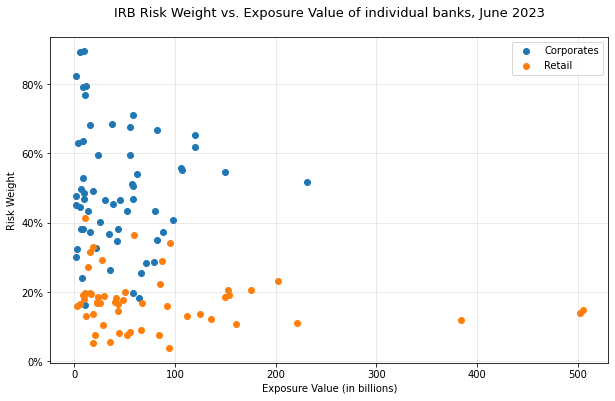

In [17]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting by category
for label, group in df.groupby('exposure_label'):
    plt.scatter(group['exposure_value'], group['risk_weight'], label=label)

# Formatting x-axis as thousands
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:,.0f}'))

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.title('IRB Risk Weight vs. Exposure Value of individual banks, June 2023', fontsize=13, pad=20)
plt.xlabel('Exposure Value (in billions)')
plt.ylabel('Risk Weight')
plt.grid(True, color='grey', alpha=0.2)
plt.legend()
plt.show()

In [12]:
df.head(10)

Label,exposure_label,portfolio_label,Name,country_label,exposure_value,defaulted_risk_exposure,risk_exposure,exposure_type_size,risk_weight
389,Corporates,IRB,ABN AMRO Bank N.V.,Netherlands,"62,774.26","2,217.29","33,906.92",3,54.01
390,Corporates,IRB,AIB Group plc,Ireland,"9,726.90",0.00,"8,697.07",3,89.41
391,Corporates,IRB,Atlantic Lux HoldCo S.à r.l.,Germany,"2,750.18",0.00,888.10,3,32.29
392,Corporates,IRB,BANCA POPOLARE DI SONDRIO SOCIETA' PER AZIONI,Italy,"13,521.04",212.43,"5,871.94",3,43.43
393,Corporates,IRB,BANCO BPM SOCIETA' PER AZIONI,Italy,"42,921.55",449.63,"14,877.07",3,34.66
394,Corporates,IRB,BAWAG Group AG,Austria,"1,453.01",0.00,691.65,3,47.60
395,Corporates,IRB,BNP Paribas,France,"119,963.17","3,918.37","78,401.86",3,65.35
396,Corporates,IRB,BPER Banca S.p.A.,Italy,"23,572.77",264.80,"14,066.04",3,59.67
397,Corporates,IRB,"Banco Bilbao Vizcaya Argentaria, S.A.",Spain,"55,295.58",370.63,"37,329.95",3,67.51
398,Corporates,IRB,"Banco Comercial Português, SA",Portugal,"11,672.28",404.10,"9,283.49",3,79.53
